In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import sys, os, warnings, dvc.api
warnings.filterwarnings('ignore')

In [2]:
# set up paths and helper scripts
sys.path.append('.')
sys.path.insert(1, '../scripts/')

from defaults import *
import dataCleaner as dc
import dataVisualizer as dv

# setup helper scripts
cleaner = dc.dataCleaner('EDA notebook')
visualizer = dv.dataVisualizer('EDA notebook')

--> <Logger dataCleaner (WARNING)>
logger <Logger dataCleaner (INFO)> created at path: ../logs/cleaner_root.log
Data cleaner in action
--> <Logger dataVisualizer (WARNING)>
logger <Logger dataVisualizer (INFO)> created at path: ../logs/visualizer_root.log
Data visualizer in action


In [3]:
# read data using dvc
version = 'v1'

# data path using dvc api
data_url = dvc.api.get_url(path = path, repo = repo, rev = version)

# reading the csv file
missing_values = ["n/a", "na", "undefined", '?', 'NA', 'undefined']
df = pd.read_csv(data_url, na_values=missing_values)
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


data set contains more than 8 thousand records and 9 features

# EDA

## General data statistics

In [4]:
print(f'shape: {df.shape}, size: {df.size}')

shape: (8077, 9), size: 72693


data set contating more than 8 thousand records and 9 features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


## Duplicates, missing and empty values

In [6]:
df.duplicated().value_counts()

False    8077
dtype: int64

There are no duplicated rows

In [7]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

As we can see there seems to be no null values

In [8]:
# descriptive statistics that summarize the central tendency, dispersion of the data frames numerical columns, excluding NaN values
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


## Univariate analysis

### Features, data types and descriptions

#### Auction Id

In [9]:
# unique value counts
unique_counts = df['auction_id'].nunique()
unique_counts

8077

* Each auction id is uniuque

#### Experiment

In [10]:
# unique value counts
counts_df = df['experiment'].value_counts()
counts_df

control    4071
exposed    4006
Name: experiment, dtype: int64

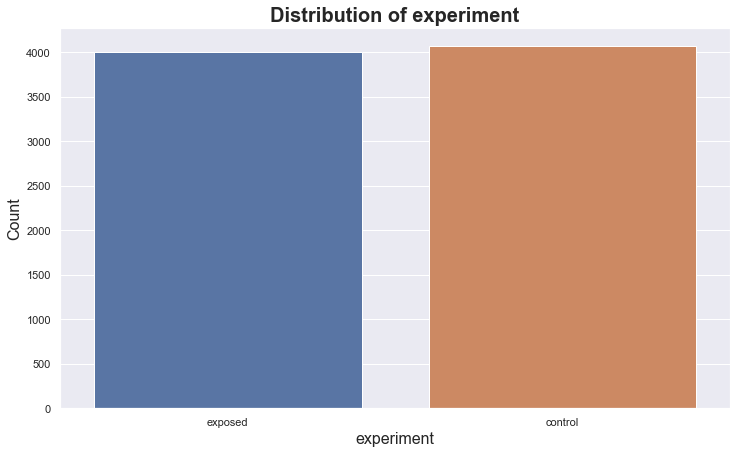

In [11]:
visualizer.plot_count(df, 'experiment')

* This show us that the grouping of control and exposed is balanced in terms of numbers. This will later be checked if the difference in amounts is not significant.

#### Date

In [12]:
# unique value counts
counts_df = df['date'].value_counts()
counts_df

2020-07-03    2015
2020-07-09    1208
2020-07-08    1198
2020-07-04     903
2020-07-10     893
2020-07-05     890
2020-07-06     490
2020-07-07     480
Name: date, dtype: int64

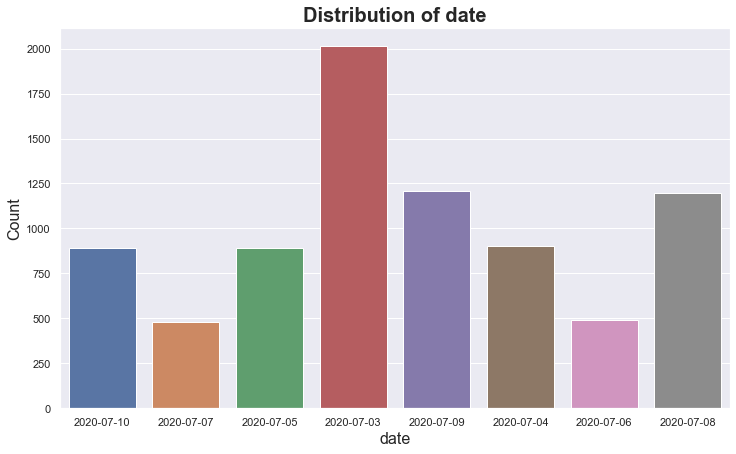

In [13]:
visualizer.plot_count(df, 'date')

* We have the test running for 8 days, and we can infer that the first day 2020/07/03 has received the highest number of visitors from the rest of the days.

#### Hour

In [14]:
# unique value counts
counts_df = df['hour'].value_counts()
counts_df

15    1895
8      394
7      381
9      346
10     336
16     335
6      327
14     319
5      302
13     290
11     282
4      281
12     278
18     273
3      266
20     264
17     263
2      230
19     227
1      222
21     206
0      194
22     135
23      31
Name: hour, dtype: int64

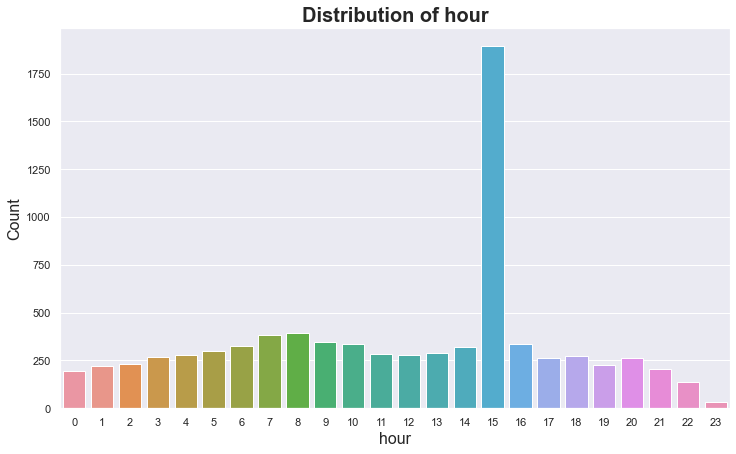

In [15]:
visualizer.plot_count(df, 'hour')

* Hour 15 was the most busiest as the visitors traffic was very high almost 3 times the average of the rest hours.

#### Device

In [16]:
# unique value counts
counts_df = df['device_make'].value_counts()
counts_df

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [21]:
counts_df.nlargest(20)

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
Samsung SM-G930F        100
Samsung SM-G975F         97
Samsung SM-A202F         88
Samsung SM-A405FN        87
Samsung SM-J330FN        69
Samsung SM-G965F         66
Samsung SM-A105FN        66
Nokia$2$3                64
Samsung SM-G935F         63
Nokia undefined$2$3      60
Samsung SM-G970F         58
Samsung SM-A705FN        56
Samsung SM-A505FN        53
Samsung SM-A520F         51
Samsung SM-G920F         48
Name: device_make, dtype: int64

In [26]:
type(df['device_make'])

pandas.core.series.Series

In [22]:
visualizer.plot_count(counts_df.nlargest(20), 'device_make')

ValueError: Could not interpret input 'device_make'

<Figure size 864x504 with 0 Axes>

#### Platform

#### Browser

#### Yes

#### No

## Bivariate analysis

#### Experiment and date

#### Experiment and hour

#### Experiment and device

#### Experiment and platform

#### Experiment and browser

#### Experiment and os

#### Experiment and yes

#### Experiment and no

## Correlations